<a href="https://colab.research.google.com/github/singhsukhendra/2015/blob/master/Pneumonia_Detection_with_Quaternion_Residual_Attention_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:
!pip install keras=="2.2.4"

     |████████████████████████████████| 312 kB 5.3 MB/s 
     |████████████████████████████████| 50 kB 3.4 MB/s 
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0 requires tf-estimator-nightly==2.8.0.dev2021122109, which is not installed.
tensorflow 2.8.0 requires keras<2.9,>=2.8.0rc0, but you have keras 2.2.4 which is incompatible.


In [3]:
!pip install tensorflow==1.15

     |████████████████████████████████| 412.3 MB 24 kB/s 
     |████████████████████████████████| 503 kB 33.6 MB/s 
     |████████████████████████████████| 3.8 MB 11.8 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=51350916e7e502413d98ac082bda21e8df26b4719f5f73acd43af03d003677fa
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.5.3
  Attempting uninstall: te

In [4]:
!mkdir -p ~/.kaggle/
!cp kaggle.json ~/.kaggle/

In [5]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

100% 2.29G/2.29G [00:17<00:00, 82.9MB/s]
100% 2.29G/2.29G [00:17<00:00, 138MB/s] 


In [6]:

import zipfile
with zipfile.ZipFile("/content/chest-xray-pneumonia.zip","r") as zip_ref:
    zip_ref.extractall("chest-xray-pneumonia")

In [7]:
! mkdir data_used

In [8]:
!mkdir data_used/NORMAL

In [9]:
!mkdir data_used/PNEUMONIA

In [10]:
! cp -r /content/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL/*.jpeg   /content/data_used/NORMAL

In [11]:
! cp -r /content/chest-xray-pneumonia/chest_xray/chest_xray/test/NORMAL/*.jpeg   /content/data_used/NORMAL

In [12]:
! cp -r /content/chest-xray-pneumonia/chest_xray/chest_xray/val/NORMAL/*.jpeg   /content/data_used/NORMAL

In [13]:
! cp -r /content/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/*.jpeg   /content/data_used/PNEUMONIA

In [14]:
! cp -r /content/chest-xray-pneumonia/chest_xray/chest_xray/test/PNEUMONIA/*.jpeg   /content/data_used/PNEUMONIA

In [15]:
! cp -r /content/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/*.jpeg   /content/data_used/PNEUMONIA

In [16]:
import zipfile

with zipfile.ZipFile("complexnn.zip","r") as zip_ref:
    zip_ref.extractall()

In [17]:
import pandas as pd
import numpy as np
import os

from glob import glob
import itertools
import fnmatch
import random
import matplotlib.pylab as plt
#import seaborn as sns
import cv2
from sklearn.model_selection import train_test_split
%matplotlib inline

In [18]:
imagePatches = glob('/content/data_used/*/*.jpeg', recursive=True)
for filename in imagePatches[0:1000]:
    print(filename)

/content/data_used/NORMAL/IM-0145-0001.jpeg
/content/data_used/NORMAL/NORMAL2-IM-0851-0001-0001.jpeg
/content/data_used/NORMAL/IM-0484-0001.jpeg
/content/data_used/NORMAL/IM-0689-0001.jpeg
/content/data_used/NORMAL/IM-0721-0001.jpeg
/content/data_used/NORMAL/NORMAL2-IM-0418-0001.jpeg
/content/data_used/NORMAL/IM-0230-0001.jpeg
/content/data_used/NORMAL/IM-0578-0001.jpeg
/content/data_used/NORMAL/NORMAL2-IM-0898-0001.jpeg
/content/data_used/NORMAL/NORMAL2-IM-0386-0001.jpeg
/content/data_used/NORMAL/NORMAL2-IM-1422-0001.jpeg
/content/data_used/NORMAL/IM-0448-0001.jpeg
/content/data_used/NORMAL/NORMAL2-IM-0496-0001.jpeg
/content/data_used/NORMAL/IM-0354-0001.jpeg
/content/data_used/NORMAL/IM-0183-0001.jpeg
/content/data_used/NORMAL/NORMAL2-IM-1022-0001.jpeg
/content/data_used/NORMAL/NORMAL2-IM-1112-0001.jpeg
/content/data_used/NORMAL/NORMAL2-IM-0954-0001.jpeg
/content/data_used/NORMAL/NORMAL2-IM-0907-0001.jpeg
/content/data_used/NORMAL/IM-0640-0001-0002.jpeg
/content/data_used/NORMAL/IM-0

In [19]:
patternZero = '*IM*.jpeg'
patternOne = '*person*.jpeg'
classZero = fnmatch.filter(imagePatches, patternZero)
classOne = fnmatch.filter(imagePatches, patternOne)
print("IDC(-)\n\n",classZero[0:5],'\n')
print("IDC(+)\n\n",classOne[0:5])

IDC(-)

 ['/content/data_used/NORMAL/IM-0145-0001.jpeg', '/content/data_used/NORMAL/NORMAL2-IM-0851-0001-0001.jpeg', '/content/data_used/NORMAL/IM-0484-0001.jpeg', '/content/data_used/NORMAL/IM-0689-0001.jpeg', '/content/data_used/NORMAL/IM-0721-0001.jpeg'] 

IDC(+)

 ['/content/data_used/PNEUMONIA/person956_virus_1628.jpeg', '/content/data_used/PNEUMONIA/person1300_virus_2240.jpeg', '/content/data_used/PNEUMONIA/person579_virus_1123.jpeg', '/content/data_used/PNEUMONIA/person16_virus_47.jpeg', '/content/data_used/PNEUMONIA/person1306_bacteria_3275.jpeg']


In [20]:
print(len(classZero))
print(len(classOne))

1583
4273


In [21]:
X=[]
y=[]

for u in classZero:
  X.append(u)
  y.append(0)

for u in classOne:
  X.append(u)
  y.append(1)

In [22]:
df = pd.DataFrame()
df["images"]=X
df["labels"]=y
df=df.sample(frac=1)

In [23]:
def RgbToQuaternion(img):
 b,g,r = cv2.split(img)

 M=np.zeros((50,50,4))
 M[:,:,1]=r
 M[:,:,2]=g
 M[:,:,3]=b
 return(np.array(M))

In [24]:
def batch_generator(df,batch_size,steps):
 idx=1
 while True: 
  yield load_data(df,idx-1,batch_size)## Yields data
  if idx < steps:
    idx+=1
  else:
    idx=1

In [25]:
def load_data(df,idx,batch_size):
 start=idx*batch_size
 end=(idx+1)*batch_size
 x = []
 y = [] 
 for  row  in df.values[start:end,:]:
  img=row[0]

  full_size_image = cv2.imread(img)
  X=cv2.resize(full_size_image, (50,50), interpolation=cv2.INTER_CUBIC)

  image = RgbToQuaternion(X) /255.
  x.append(image) 
  y.append(row[-1] )

 return (np.array(x).reshape(-1,50,50,4), np.array(y).reshape(-1))

In [26]:
df_train, df = train_test_split(df, test_size=0.20)
df_test, df_val = train_test_split(df, test_size=0.5)

In [27]:

from   complexnn                             import *
import keras
from   keras.layers                          import *
from   keras.models                          import Model
import keras.backend                         as     K
import numpy                                 as     np


Using TensorFlow backend.


In [28]:
#from   tensorflow.keras.layers                          import *

In [29]:
from keras.optimizers import Adam

In [30]:
#from keras.optimizers import adam
opt = Adam(lr = 0.001,decay=1e-6)

In [31]:
#import tensorflow as tf
# ensure consistency across runs
from numpy.random import seed
seed(1)

In [32]:
class ChannelAttention(keras.layers.Layer):
      def __init__(self, filters, ratio):
        super(ChannelAttention, self).__init__()
        self.filters = filters
        self.ratio = ratio

        def build(self, input_shape):
            self.shared_layer_one = tf.keras.layers.Dense(self.filters//self.ratio,
                             activation='relu', kernel_initializer='he_normal', 
                              use_bias=True, 
                              bias_initializer='zeros')
            self.shared_layer_two = tf.keras.layers.Dense(self.filters,
                             kernel_initializer='he_normal',
                             use_bias=True,
                             bias_initializer='zeros')

        def call(self, inputs):
            # AvgPool
            avg_pool = keras.layers.GlobalAveragePooling2D()(inputs)
            

            avg_pool = self.shared_layer_one(avg_pool)
            avg_pool = self.shared_layer_two(avg_pool)

            # MaxPool
            max_pool = keras.layers.GlobalMaxPooling2D()(inputs)
            max_pool = keras.layers.Reshape((1,1,filters))(max_pool)

            max_pool = self.shared_layer_one(max_pool)
            max_pool = self.shared_layer_two(max_pool)


            attention = keras.layers.Add()([avg_pool,max_pool])
            attention = keras.layers.Activation('sigmoid')(attention)
            
            return keras.layers.Multiply()([inputs, attention])

class SpatialAttention(keras.layers.Layer):
      def __init__(self, kernel_size):
        super(SpatialAttention, self).__init__()
        self.kernel_size = kernel_size
        
        def build(self, input_shape):
            self.conv2d = keras.layers.Conv2D(filters = 1,
                    kernel_size=self.kernel_size,
                    strides=1,
                    padding='same',
                    activation='sigmoid',
                    kernel_initializer='he_normal',
                    use_bias=False)

        def call(self, inputs):
            
            # AvgPool
            avg_pool = keras.layers.Lambda(lambda x: tf.keras.backend.mean(x, axis=3, keepdims=True))(inputs)
            
            # MaxPool
            max_pool = keras.layers.Lambda(lambda x: tf.keras.backend.max(x, axis=3, keepdims=True))(inputs)

            attention = keras.layers.Concatenate(axis=3)([avg_pool, max_pool])

            attention = self.conv2d(attention)


            return tf.keras.layers.multiply([inputs, attention])



In [33]:
def residual_block(mod_, f_in, f_out, strides_ = (1,1), use_shortcut_ = False):   
    shortcut_ = mod_
    
    k_ = (1,1)
    
    mod_ = QuaternionConv2D(f_in, kernel_size=k_, strides=(1,1), padding = "same")(mod_)
    mod_ = BatchNormalization()(mod_)
    mod_ = ELU()(mod_)
    
    mod_ = QuaternionConv2D(f_in, kernel_size=k_, strides=strides_, padding = "same")(mod_)
    mod_ = BatchNormalization()(mod_)
    mod_ = ELU()(mod_)
    
    mod_ = QuaternionConv2D(f_out, kernel_size=k_, strides=(1,1), padding = "same")(mod_)
    mod_ = BatchNormalization()(mod_)
    mod_ = ELU()(mod_)
    
    if use_shortcut_ == True or strides_ != (1,1):
        shortcut_ = QuaternionConv2D(f_out, kernel_size=k_, strides=strides_, padding = "same")(shortcut_)
        shortcut_ = BatchNormalization()(shortcut_)
        
    mod_ = Add()([shortcut_, mod_])
    mod_ = ReLU()(mod_)
    
    return mod_

In [34]:
def model_build(in_):
    
    k_=(1,1)
    
    mod_ = QuaternionConv2D(16, kernel_size=k_, strides = (1,1), padding = "same")(in_)
    
    mod_ = BatchNormalization()(mod_)    
    
    mod_ = ReLU()(mod_)
    mod_=  ChannelAttention(16, 8)(mod_)
    mod_= SpatialAttention(3)(mod_)
    mod_ = MaxPooling2D()(mod_)
    
    mod_ = residual_block(mod_, 16, 32, use_shortcut_=True)
    
    mod_ = MaxPooling2D()(mod_)
    mod_=  ChannelAttention(16, 8)(mod_)
    mod_= SpatialAttention(3)(mod_)
    
    mod_ = residual_block(mod_, 32, 64, use_shortcut_=True)
    
    mod_ = MaxPooling2D()(mod_)
    mod_=  ChannelAttention(32, 8)(mod_)
    mod_= SpatialAttention(3)(mod_)
    
    mod_ = residual_block(mod_, 64, 96, use_shortcut_=True)
    
    mod_ = MaxPooling2D()(mod_)
    mod_=  ChannelAttention(64, 8)(mod_)
    mod_= SpatialAttention(3)(mod_)
    
    mod_ = residual_block(mod_, 96, 128, use_shortcut_=True)
    
    mod_ = MaxPooling2D()(mod_)
    mod_=  ChannelAttention(96, 8)(mod_)
    mod_= SpatialAttention(3)(mod_)
    
    
    mod_ = GlobalAveragePooling2D()(mod_)
    
    mod_ = Dense(512, activation = "relu")(mod_)
    
    mod_ = Dropout(0.5)(mod_)
    
    mod_ = Dense(1, activation="sigmoid")(mod_)
    
    return mod_

In [35]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [36]:
in_ = Input((50,50,4))
model_ = model_build(in_)













Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [37]:
model = Model(input = in_, output = model_)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  """Entry point for launching an IPython kernel.


In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.callbacks import ReduceLROnPlateau
import cv2
import os

In [39]:
METRICS = [
      tf.keras.metrics.TruePositives(name='tp'),
      tf.keras.metrics.FalsePositives(name='fp'),
      tf.keras.metrics.TrueNegatives(name='tn'),
      tf.keras.metrics.FalseNegatives(name='fn'), 
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),
      tf.keras.metrics.AUC(name='roc', curve='ROC'), # roc curve
      tf.keras.metrics.AUC(name='prc', curve='PR') # precision-recall curve
]

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [40]:
           
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy',precision_m,recall_m,f1_m])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [41]:
history =model.fit_generator(batch_generator(df_train, 128,len(df_train)//128),\
                    steps_per_epoch=len(df_train)//128,epochs=50,\
                    verbose=1,validation_data=batch_generator(df_val, 64,len(df_val)//64),validation_steps=len(df_val)//64)



Epoch 1/50
36/36 [==============================] - 78s 2s/step - loss: 0.6958 - acc: 0.8305 - precision_m: 0.8922 - recall_m: 0.8866 - f1_m: 0.8751 - val_loss: 0.5858 - val_acc: 0.7153 - val_precision_m: 0.9891 - val_recall_m: 0.6170 - val_f1_m: 0.7578
Epoch 2/50
36/36 [==============================] - 68s 2s/step - loss: 0.2244 - acc: 0.9110 - precision_m: 0.9375 - recall_m: 0.9415 - f1_m: 0.9390 - val_loss: 0.3438 - val_acc: 0.8576 - val_precision_m: 0.9636 - val_recall_m: 0.8371 - val_f1_m: 0.8950
Epoch 3/50
36/36 [==============================] - 67s 2s/step - loss: 0.1818 - acc: 0.9345 - precision_m: 0.9537 - recall_m: 0.9572 - f1_m: 0.9550 - val_loss: 0.2866 - val_acc: 0.8837 - val_precision_m: 0.8811 - val_recall_m: 0.9679 - val_f1_m: 0.9218
Epoch 4/50
36/36 [==============================] - 67s 2s/step - loss: 0.1618 - acc: 0.9355 - precision_m: 0.9543 - recall_m: 0.9585 - f1_m: 0.9559 - val_loss: 0.2441 - val_acc: 0.8854 - val_precision_m: 0.9067 - val_recall_m: 0.9398 -

In [57]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 50, 50, 4)    0                                            
__________________________________________________________________________________________________
quaternion_conv2d_1 (Quaternion (None, 50, 50, 64)   128         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 50, 50, 64)   256         quaternion_conv2d_1[0][0]        
__________________________________________________________________________________________________
re_lu_1 (ReLU)                  (None, 50, 50, 64)   0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
channel_at

In [58]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'val_precision_m', 'val_recall_m', 'val_f1_m', 'loss', 'acc', 'precision_m', 'recall_m', 'f1_m'])


dict_keys(['val_loss', 'val_acc', 'val_precision_m', 'val_recall_m', 'val_f1_m', 'loss', 'acc', 'precision_m', 'recall_m', 'f1_m'])


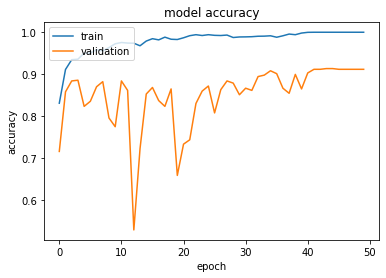

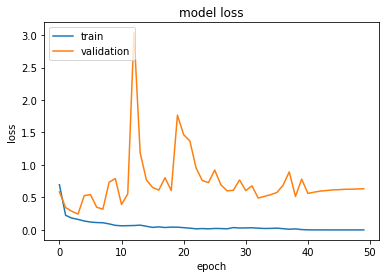

In [59]:
# tensorboard logs 
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [60]:
print('\nhistory dict:', history.history)


history dict: {'val_loss': [0.585760172870424, 0.3437786400318146, 0.28656725419892204, 0.2440882275501887, 0.5287534793217977, 0.5448814663622115, 0.349440336227417, 0.3187349769804213, 0.7341820134056939, 0.7907089855935838, 0.39087601833873326, 0.5547898511091868, 3.043407917022705, 1.1868688993983798, 0.7709226475821601, 0.6529486808511946, 0.6133460336261325, 0.8033363024393717, 0.6058381961451637, 1.7668763266669378, 1.46682698196835, 1.3692440655496385, 0.9550305207570394, 0.7600478397475349, 0.7286537554528978, 0.9214360581503974, 0.6938129630353715, 0.6017643047703637, 0.6095570988125272, 0.7687914702627394, 0.6052743196487427, 0.6786576840612624, 0.49062108827961814, 0.5160969131522708, 0.5421372718281217, 0.5752110448148515, 0.6871678895420499, 0.8928966058625115, 0.514979769786199, 0.7818014787303077, 0.5622700750827789, 0.5812738753027387, 0.5976260933611128, 0.6067231595516205, 0.6160872115029229, 0.6192651755279965, 0.6261551943090227, 0.6268063452508714, 0.630753192636

# Evaluation on testing set 

In [61]:

loss, accuracy, f1_score, precision, recall = model.evaluate_generator(batch_generator(df_test[:256], 256,len(df_test[:256])//256),steps=len(df_test[:256])//256,verbose=1)

1/1 [==============================] - 4s 4s/step


In [62]:
print(model.evaluate_generator(batch_generator(df_test[:256], 256,len(df_test[:256])//256),steps=len(df_test[:256])//256,verbose=1))

1/1 [==============================] - 6s 6s/step
[0.34346288442611694, 0.94921875, 0.9679144620895386, 0.9627659320831299, 0.9653332233428955]


In [63]:
print(model.evaluate_generator(batch_generator(df_train[:256], 256,len(df_train[:256])//256),steps=len(df_train[:256])//256,verbose=1))

1/1 [==============================] - 5s 5s/step
[3.7193654861766845e-05, 1.0, 1.0, 1.0, 1.0]


In [64]:
print(model.evaluate_generator(batch_generator(df_val[:256], 256,len(df_val[:256])//256),steps=len(df_val[:256])//256,verbose=1))

1/1 [==============================] - 5s 5s/step
[0.6928139328956604, 0.89453125, 0.9132652878761292, 0.9470899701118469, 0.929870069026947]


In [65]:
help(model.evaluate_generator)

Help on method evaluate_generator in module keras.engine.training:

evaluate_generator(generator, steps=None, max_queue_size=10, workers=1, use_multiprocessing=False, verbose=0) method of keras.engine.training.Model instance
    Evaluates the model on a data generator.
    
    The generator should return the same kind of data
    as accepted by `test_on_batch`.
    
    # Arguments
        generator: Generator yielding tuples (inputs, targets)
            or (inputs, targets, sample_weights)
            or an instance of Sequence (keras.utils.Sequence)
            object in order to avoid duplicate data
            when using multiprocessing.
        steps: Total number of steps (batches of samples)
            to yield from `generator` before stopping.
            Optional for `Sequence`: if unspecified, will use
            the `len(generator)` as a number of steps.
        max_queue_size: maximum size for the generator queue
        workers: Integer. Maximum number of processes to 

### **The performance metrics**

In [66]:
from sklearn.metrics import confusion_matrix

y_pred=model.predict_generator(batch_generator(df_test[:256], 256,len(df_test[:256])//256),steps=len(df_test[:256])//256,verbose=1)

y_true=df_test[:256].labels
array=confusion_matrix(y_true, (1.2*y_pred).round(),normalize="true")

1/1 [==============================] - 5s 5s/step


In [67]:
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense

In [68]:
accuracy = accuracy_score(y_true, (1.2*y_pred).round())

In [69]:
accuracy

0.94921875

In [70]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_true, (1.2*y_pred).round())
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_true, (1.2*y_pred).round())
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_true, (1.2*y_pred).round())
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_true, (1.2*y_pred).round())
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(y_true, (1.2*y_pred).round())
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_true, (1.2*y_pred).round())
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_true, (1.2*y_pred).round())
print(matrix)

Accuracy: 0.949219
Precision: 0.967914
Recall: 0.962766
F1 score: 0.965333
Cohens kappa: 0.870445
ROC AUC: 0.937265
[[ 62   6]
 [  7 181]]


In [74]:
import sklearn.metrics as metrics

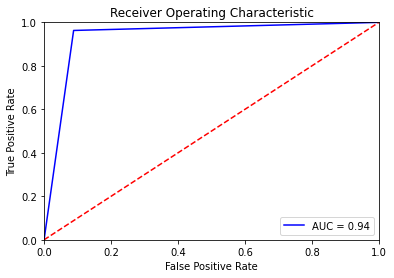

In [75]:
fpr, tpr, threshold = metrics.roc_curve(y_true, (1.2*y_pred).round())
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [76]:
print(metrics.accuracy_score(y_true, (1.2*y_pred).round()))

0.94921875


In [77]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning libraries

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve,roc_auc_score

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [78]:
 # Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['Probability','Accuracy','Sensitivity','Specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_true, (1.2*y_pred).round())
    total1=sum(sum(cm1))
    Accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    Specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    Sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,Accuracy,Sensitivity,Specificity]
print(cutoff_df)

     Probability  Accuracy  Sensitivity  Specificity
0.0          0.0  0.949219     0.962766     0.911765
0.1          0.1  0.949219     0.962766     0.911765
0.2          0.2  0.949219     0.962766     0.911765
0.3          0.3  0.949219     0.962766     0.911765
0.4          0.4  0.949219     0.962766     0.911765
0.5          0.5  0.949219     0.962766     0.911765
0.6          0.6  0.949219     0.962766     0.911765
0.7          0.7  0.949219     0.962766     0.911765
0.8          0.8  0.949219     0.962766     0.911765
0.9          0.9  0.949219     0.962766     0.911765


In [79]:
print(Accuracy,Sensitivity,Specificity)

0.94921875 0.9627659574468085 0.9117647058823529


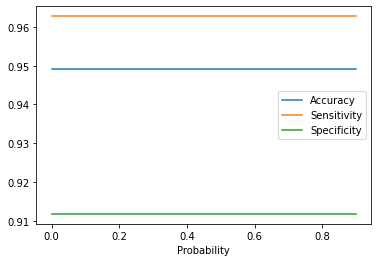

In [80]:
import matplotlib.pyplot as plt
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='Probability', y=['Accuracy','Sensitivity','Specificity'])
plt.show()

In [81]:
# # Let's plot accuracy sensitivity and specificity for various probabilities.


import matplotlib.pyplot as plt


cutoff_df = pd.DataFrame( columns = ['Probability','Accuracy','Sensitivity','Specificity'])

plt.show()
plt.savefig('ss')

<Figure size 432x288 with 0 Axes>

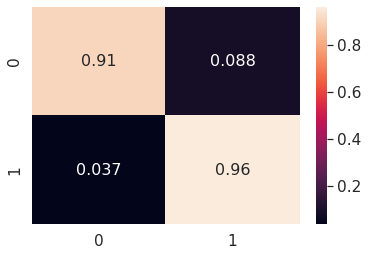

In [82]:
import seaborn as sn

df_cm = pd.DataFrame(array, range(2), range(2))
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

In [83]:
df_cm

,0,1
0,0.911765,0.088235
1,0.037234,0.962766


In [84]:
help(model.predict_generator)

Help on method predict_generator in module keras.engine.training:

predict_generator(generator, steps=None, max_queue_size=10, workers=1, use_multiprocessing=False, verbose=0) method of keras.engine.training.Model instance
    Generates predictions for the input samples from a data generator.
    
    The generator should return the same kind of data as accepted by
    `predict_on_batch`.
    
    # Arguments
        generator: Generator yielding batches of input samples
            or an instance of Sequence (keras.utils.Sequence)
            object in order to avoid duplicate data
            when using multiprocessing.
        steps: Total number of steps (batches of samples)
            to yield from `generator` before stopping.
            Optional for `Sequence`: if unspecified, will use
            the `len(generator)` as a number of steps.
        max_queue_size: Maximum size for the generator queue.
        workers: Integer. Maximum number of processes to spin up
            w

In [86]:
print(accuracy, f1_score, precision, recall)

0.94921875 <function f1_score at 0x7f3045e35710> 0.9679144385026738 0.9627659574468085


In [87]:
sensitivity=recall

In [88]:
sensitivity

0.9627659574468085

In [91]:
tn, fp, fn, tp =array.ravel()

In [92]:
tn, fp, fn, tp

(0.9117647058823529,
 0.08823529411764706,
 0.03723404255319149,
 0.9627659574468085)

In [95]:
specificity =tn / (tn + fp)

In [94]:
specificity

0.9117647058823529

In [96]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

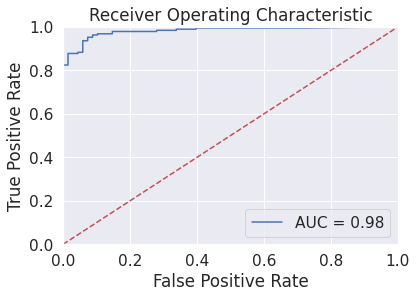

In [97]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(y_true,y_pred)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [98]:
model.save_weights('mymodel_weights')